# (Divvy bicycle sharing service Data)
## by (Hany Aly Elmogey)

## Preliminary Wrangling

> In this notebook will explore the bike sharing data which contains trip duration, usertype (subscriber or customer) start station, end station, and Date of the trip.

### Downloading the dataset

In [72]:
import os
import zipfile
import shutil


def download_files():
    # This function is to download the datasets then take the used 6 files 
    
    # Downloading the files
    os.chdir("zip_folder")
    zip_files_names = os.listdir()
    if "Divvy_Stations_Trips_2014_Q1Q2.zip" not in zip_files_names: 
        !wget https://divvy-tripdata.s3.amazonaws.com/Divvy_Stations_Trips_2014_Q1Q2.zip
    if "Divvy_Stations_Trips_2014_Q3Q4.zip" not in zip_files_names: 
        !wget https://divvy-tripdata.s3.amazonaws.com/Divvy_Stations_Trips_2014_Q3Q4.zip
    if "Divvy_Trips_2015.zip" not in zip_files_names: 
        !wget https://divvy-tripdata.s3.amazonaws.com/Divvy_Trips_2015-Q1Q2.zip
    if "Divvy_Trips_2015_Q3Q4.zip" not in zip_files_names: 
        !wget https://divvy-tripdata.s3.amazonaws.com/Divvy_Trips_2015_Q3Q4.zip

    zip_files_names = os.listdir()
    
    # List of the used files
    file_name = ["Divvy_Trips_2014_Q1Q2.csv","Divvy_Trips_2015_08.csv", "Divvy_Trips_2015-Q1.csv", "Divvy_Trips_2015-Q2.csv"]

    # Unzipe the downloaded files
    for file in zip_files_names:
        with zipfile.ZipFile(file,"r") as zip_ref:
            zip_ref.extractall()



    os.chdir("..")

    # Moving the used 6 csv files to the main folder of the data
    for file in file_name:
        shutil.move('zip_folder/' + file, 'csv_files/' + file)


    shutil.move("zip_folder/Divvy_Stations_Trips_2014_Q3Q4/Divvy_Trips_2014-Q3-07.csv", 'csv_files/Divvy_Trips_2014-Q3-07.csv')
    shutil.move("zip_folder/Divvy_Stations_Trips_2014_Q3Q4/Divvy_Trips_2014-Q4.csv", 'csv_files/Divvy_Trips_2014-Q4.csv')
    
    # Deleting unnecessary files
    shutil.rmtree("zip_folder")
    os.mkdir("zip_folder")

    
# Uncomment the next line to download the files

download_files()



--2021-01-05 11:08:30--  https://divvy-tripdata.s3.amazonaws.com/Divvy_Stations_Trips_2014_Q1Q2.zip
Resolving divvy-tripdata.s3.amazonaws.com (divvy-tripdata.s3.amazonaws.com)... 52.217.105.204
Connecting to divvy-tripdata.s3.amazonaws.com (divvy-tripdata.s3.amazonaws.com)|52.217.105.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17997624 (17M) [application/zip]
Saving to: ‘Divvy_Stations_Trips_2014_Q1Q2.zip’

Divvy_Stations_Trip 100%[===================>]  17.16M   946KB/s    in 13s     

2021-01-05 11:08:44 (1.31 MB/s) - ‘Divvy_Stations_Trips_2014_Q1Q2.zip’ saved [17997624/17997624]

--2021-01-05 11:08:45--  https://divvy-tripdata.s3.amazonaws.com/Divvy_Stations_Trips_2014_Q3Q4.zip
Resolving divvy-tripdata.s3.amazonaws.com (divvy-tripdata.s3.amazonaws.com)... 52.216.144.251
Connecting to divvy-tripdata.s3.amazonaws.com (divvy-tripdata.s3.amazonaws.com)|52.216.144.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30838872 (29M

In [73]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [74]:
files_path = "csv_files/"
save_path = "all_files_compined.csv"

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [75]:



def merge_csv_file(path,save_path):
    # This function is to merge the used 6 csv files into one csv file
    files = os.listdir(path)
    df = pd.concat(pd.read_csv(path+f) for f in files)

    df.to_csv(save_path,index=False,encoding= "utf-8-sig")
              

# Uncomment the next line to merge the files

#merge_csv_file(files_path,save_path)





In [76]:

df = pd.read_csv(save_path)



In [77]:
df.head()

,trip_id,start_time,stop_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,2886259,7/31/2014 23:56,8/1/2014 0:03,2602,386,291,Wells St & Evergreen Ave,53,Wells St & Erie St,Subscriber,Female,1979.0
1,2886258,7/31/2014 23:58,8/1/2014 0:07,2403,495,98,LaSalle St & Washington St,106,State St & Pearson St,Subscriber,Male,1974.0
2,2886257,7/31/2014 23:58,8/1/2014 2:10,669,7947,240,Sheridan Rd & Irving Park Rd,240,Sheridan Rd & Irving Park Rd,Customer,NaN,NaN
3,2886256,7/31/2014 23:58,8/1/2014 0:19,2431,1282,47,State St & Kinzie St,14,Morgan St & 18th St,Customer,NaN,NaN
4,2886255,7/31/2014 23:57,8/1/2014 2:10,2885,7972,240,Sheridan Rd & Irving Park Rd,240,Sheridan Rd & Irving Park Rd,Customer,NaN,NaN


In [78]:
df.shape

(3345272, 12)

In [79]:
print("columns are",list(df))

columns are ['trip_id', 'start_time', 'stop_time', 'bikeid', 'tripduration', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthyear']


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3345272 entries, 0 to 3345271
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   trip_id            int64  
 1   start_time         object 
 2   stop_time          object 
 3   bikeid             int64  
 4   tripduration       int64  
 5   from_station_id    int64  
 6   from_station_name  object 
 7   to_station_id      int64  
 8   to_station_name    object 
 9   usertype           object 
 10  gender             object 
 11  birthyear          float64
dtypes: float64(1), int64(5), object(6)
memory usage: 306.3+ MB


In [81]:
df.describe()

,trip_id,bikeid,tripduration,from_station_id,to_station_id,birthyear
count,3.345272e+06,3.345272e+06,3.345272e+06,3.345272e+06,3.345272e+06,2.311258e+06
mean,4.069538e+06,1.938001e+03,1.032456e+03,1.654179e+02,1.653819e+02,1.978957e+03
std,1.854498e+06,1.209215e+03,2.023831e+03,1.075708e+02,1.078348e+02,1.050792e+01
min,1.109420e+06,1.000000e+00,6.000000e+01,2.000000e+00,2.000000e+00,1.898000e+03
25%,2.266495e+06,9.460000e+02,4.240000e+02,7.400000e+01,7.400000e+01,1.973000e+03
50%,4.297934e+06,1.854000e+03,7.320000e+02,1.530000e+02,1.530000e+02,1.982000e+03
75%,5.511502e+06,2.736000e+03,1.220000e+03,2.540000e+02,2.540000e+02,1.987000e+03
max,7.221407e+06,4.837000e+03,8.639200e+04,5.110000e+02,5.110000e+02,1.999000e+03


### Checking for nulls and nans

In [82]:
df.isnull().sum()

trip_id                    0
start_time                 0
stop_time                  0
bikeid                     0
tripduration               0
from_station_id            0
from_station_name          0
to_station_id              0
to_station_name            0
usertype                   0
gender               1034094
birthyear            1034014
dtype: int64

In [83]:
df["gender"].value_counts()

Male      1749979
Female     561199
Name: gender, dtype: int64

### 1 million is too big but we can.t compancate male and female so will remove nulls and thats why i merged many files as we have now almost 3 million so even after removing we will still have enough records 

In [84]:
df.dropna(axis = 0,inplace = True)

In [85]:
df.isnull().sum()

trip_id              0
start_time           0
stop_time            0
bikeid               0
tripduration         0
from_station_id      0
from_station_name    0
to_station_id        0
to_station_name      0
usertype             0
gender               0
birthyear            0
dtype: int64

In [86]:
df.shape

(2311129, 12)

In [87]:
# a function that creates columns for year and month and day that are extracted from the start_time and end_time
def get_year_month_day(df):
    df.start_time = pd.to_datetime(df.start_time)
    df["S_Day"] = df.start_time.dt.strftime("%A")
    df["S_Year"] = df.start_time.dt.strftime("%Y")
    df["S_Month"] = df.start_time.dt.strftime("%B")

    df.stop_time = pd.to_datetime(df.stop_time)
    df["E_Day"] = df.stop_time.dt.strftime("%A")
    df["E_Year"] = df.stop_time.dt.strftime("%Y")
    df["E_Month"] = df.stop_time.dt.strftime("%B")
    
    
    week_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
    df['S_Day'] = pd.Categorical(df['S_Day'], categories=week_days,ordered=True)

    df['E_Day'] = pd.Categorical(df['E_Day'], categories=week_days,ordered=True)


    return df


In [88]:
df = get_year_month_day(df)

### From the starttime features i created S_Day ( Start day ), S_Year, S_Month and also for the stoptime

In [89]:
df[df.E_Year != df.S_Year]

,trip_id,start_time,stop_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,S_Day,S_Year,S_Month,E_Day,E_Year,E_Month
2013420,4413164,2014-12-31 23:46:00,2015-01-01 00:37:00,2563,3084,168,Michigan Ave & 14th St,168,Michigan Ave & 14th St,Subscriber,Male,1987.0,Wednesday,2014,December,Thursday,2015,January
2013421,4413163,2014-12-31 23:44:00,2015-01-01 00:10:00,389,1570,43,Michigan Ave & Washington St,163,Damen Ave & Clybourn Ave,Subscriber,Male,1983.0,Wednesday,2014,December,Thursday,2015,January


### Logic they started at the end of the year just before 12 am

In [90]:
df[df.E_Month != df.S_Month]

,trip_id,start_time,stop_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,S_Day,S_Year,S_Month,E_Day,E_Year,E_Month
0,2886259,2014-07-31 23:56:00,2014-08-01 00:03:00,2602,386,291,Wells St & Evergreen Ave,53,Wells St & Erie St,Subscriber,Female,1979.0,Thursday,2014,July,Friday,2014,August
1,2886258,2014-07-31 23:58:00,2014-08-01 00:07:00,2403,495,98,LaSalle St & Washington St,106,State St & Pearson St,Subscriber,Male,1974.0,Thursday,2014,July,Friday,2014,August
10,2886249,2014-07-31 23:56:00,2014-08-01 00:04:00,1422,505,246,Ashland Ave & Belle Plaine Ave,326,Clark St & Leland Ave,Subscriber,Male,1988.0,Thursday,2014,July,Friday,2014,August
11,2886248,2014-07-31 23:56:00,2014-08-01 00:04:00,1329,464,291,Wells St & Evergreen Ave,106,State St & Pearson St,Subscriber,Female,1988.0,Thursday,2014,July,Friday,2014,August
13,2886246,2014-07-31 23:56:00,2014-08-01 00:14:00,2920,1121,113,Bissell St & Armitage Ave,289,Wells St & Concord Ln,Subscriber,Male,1986.0,Thursday,2014,July,Friday,2014,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169057,5005937,2015-04-30 23:47:00,2015-05-01 00:06:00,2162,1119,420,Ellis Ave & 55th St,149,Calumet Ave & 33rd St,Subscriber,Male,1980.0,Thursday,2015,April,Friday,2015,May
3169058,5005936,2015-04-30 23:47:00,2015-05-01 00:08:00,1891,1266,290,Kedzie Ave & Palmer Ct,298,Lincoln Ave & Belle Plaine Ave,Subscriber,Male,1986.0,Thursday,2015,April,Friday,2015,May
3169412,5005405,2015-04-30 21:10:00,2015-05-01 08:19:00,2920,40102,37,Dearborn St & Adams St,50,Clark St & Congress Pkwy,Subscriber,Male,1965.0,Thursday,2015,April,Friday,2015,May
3170054,5004495,2015-04-30 19:02:00,2015-05-01 09:15:00,1831,51166,304,Broadway & Waveland Ave,349,Halsted St & Wrightwood Ave,Subscriber,Female,1986.0,Thursday,2015,April,Friday,2015,May


### the clients started at the last day of a month almost before 12 am

In [91]:
print(df.E_Month.value_counts())
print(df.S_Year.value_counts())
print(df.S_Day.value_counts())

June         473996
May          360785
August       328952
July         251727
April        241059
October      188324
March        145226
November     101275
January       79973
December      78770
February      61024
September        18
Name: E_Month, dtype: int64
2014    1211778
2015    1099351
Name: S_Year, dtype: int64
Wednesday    378677
Thursday     378376
Tuesday      375024
Friday       354850
Monday       353927
Saturday     250128
Sunday       220147
Name: S_Day, dtype: int64


In [92]:
df["Age"] = df["S_Year"].astype(float) - df["birthyear"]

In [93]:
df.describe()

,trip_id,bikeid,tripduration,from_station_id,to_station_id,birthyear,Age
count,2.311129e+06,2.311129e+06,2.311129e+06,2.311129e+06,2.311129e+06,2.311129e+06,2.311129e+06
mean,4.088847e+06,1.920310e+03,7.232478e+02,1.681105e+02,1.689295e+02,1.978958e+03,3.551784e+01
std,1.819356e+06,1.197545e+03,1.331046e+03,1.056012e+02,1.061486e+02,1.050635e+01,1.049162e+01
min,1.109427e+06,1.000000e+00,6.000000e+01,2.000000e+00,2.000000e+00,1.898000e+03,1.600000e+01
25%,2.320195e+06,9.410000e+02,3.570000e+02,7.500000e+01,7.500000e+01,1.973000e+03,2.800000e+01
50%,4.324117e+06,1.839000e+03,5.740000e+02,1.590000e+02,1.590000e+02,1.982000e+03,3.200000e+01
75%,5.437842e+06,2.711000e+03,9.100000e+02,2.540000e+02,2.550000e+02,1.987000e+03,4.100000e+01
max,7.221407e+06,4.837000e+03,8.610800e+04,5.110000e+02,5.110000e+02,1.999000e+03,1.170000e+02


In [94]:
df[df.Age > 80]

,trip_id,start_time,stop_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,S_Day,S_Year,S_Month,E_Day,E_Year,E_Month,Age
298,2885836,2014-07-31 22:45:00,2014-07-31 23:15:00,2201,1763,55,Halsted St & James M Rochford St,174,Canal St & Madison St,Subscriber,Male,1906.0,Thursday,2014,July,Thursday,2014,July,108.0
477,2885601,2014-07-31 22:19:00,2014-07-31 22:32:00,2560,794,61,Wood St & Milwaukee Ave,183,Damen Ave & Augusta Blvd,Subscriber,Female,1915.0,Thursday,2014,July,Thursday,2014,July,99.0
798,2885152,2014-07-31 21:40:00,2014-07-31 21:55:00,2201,947,174,Canal St & Madison St,55,Halsted St & James M Rochford St,Subscriber,Male,1906.0,Thursday,2014,July,Thursday,2014,July,108.0
5837,2878784,2014-07-31 17:02:00,2014-07-31 17:22:00,2486,1156,191,Canal St & Monroe St,16,Wood St & North Ave,Subscriber,Female,1931.0,Thursday,2014,July,Thursday,2014,July,83.0
5891,2878710,2014-07-31 17:00:00,2014-07-31 17:09:00,2325,552,74,Kingsbury St & Erie St,27,Larrabee St & North Ave,Subscriber,Male,1900.0,Thursday,2014,July,Thursday,2014,July,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307256,4814855,2015-04-09 19:13:00,2015-04-09 19:32:00,1661,1127,174,Canal St & Madison St,214,Damen Ave & Grand Ave,Subscriber,Male,1900.0,Thursday,2015,April,Thursday,2015,April,115.0
3313041,4803213,2015-04-07 22:09:00,2015-04-07 22:24:00,788,947,174,Canal St & Madison St,98,LaSalle St & Washington St,Subscriber,Male,1906.0,Tuesday,2015,April,Tuesday,2015,April,109.0
3317868,4793298,2015-04-06 16:30:00,2015-04-06 16:50:00,781,1202,49,Dearborn St & Monroe St,27,Larrabee St & North Ave,Subscriber,Male,1900.0,Monday,2015,April,Monday,2015,April,115.0
3340191,4748893,2015-04-01 18:54:00,2015-04-01 19:05:00,1394,689,174,Canal St & Madison St,29,Noble St & Milwaukee Ave,Subscriber,Male,1900.0,Wednesday,2015,April,Wednesday,2015,April,115.0


In [95]:
df.drop(df[df.Age > 80].index, inplace = True) 

In [96]:
df[df.Age > 80]

,trip_id,start_time,stop_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,S_Day,S_Year,S_Month,E_Day,E_Year,E_Month,Age


In [97]:
len(set(df.trip_id))

2310070

In [98]:
df.shape[0]

2310070

### no duplicate in the trip_id

### What is the structure of your dataset?

> The Data consists mostly from numeric features like the start time, end time, trip duration amd some categorial features like gender station id, station name and user type 

### What is/are the main feature(s) of interest in your dataset?

> iam mainly interest in the trip duration and which month of the year has the most demand on the bikes. I had to merge some files to get more data i used data for two consecutive years 2014 and 2015 to have more information 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I had to generate some data from the start time column of the trip as i created a columns for the year, month, day and time of the trip to try to know which months of the year, which day of the month and which time of the day have the more demand on the bikes. which station has the more demand and when so we can add more bikes in that station at that certain date and time. for that part i will use start_time and from_station_id and to_station_id.

Also will try to get which type of users use the bikes the most is it the subscribed users or just one use customers so we can know will it help to add more offers for subscription or just target the one use customers and for this part will use the usertype column.

Also will investigat on which age group uses the bikes the most and was it males or females.  



# SO the questions will be 

### 1-  Which age group uses the bikes the most and was it males or females?
### 2- Which users types use the bikes the most "Subscriber" or "Customer"? 
### 3- Which season is the best for biking? 

  

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

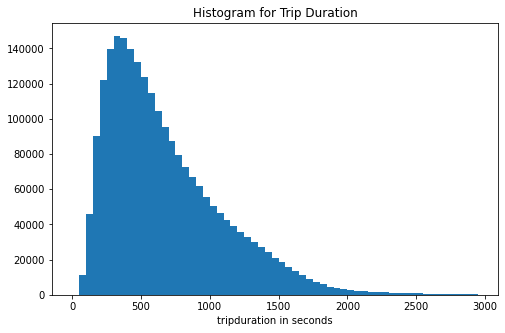

In [99]:


binsize = 50
bins = np.arange(0, 3000, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'tripduration', bins = bins)
plt.xlabel('tripduration in seconds')
plt.title("Histogram for Trip Duration");



### Most of the trips are between few seconds and 1000 seconds

In [100]:
df[(df.tripduration < 120) & (df.from_station_id != df.to_station_id)]

,trip_id,start_time,stop_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,S_Day,S_Year,S_Month,E_Day,E_Year,E_Month,Age
309,2885819,2014-07-31 22:44:00,2014-07-31 22:46:00,2881,102,68,Clinton St & Tilden St,75,Canal St & Jackson Blvd,Subscriber,Male,1952.0,Thursday,2014,July,Thursday,2014,July,62.0
380,2885729,2014-07-31 22:33:00,2014-07-31 22:34:00,2298,97,337,Clark St & Chicago Ave,140,Dearborn Pkwy & Delaware Pl,Subscriber,Male,1971.0,Thursday,2014,July,Thursday,2014,July,43.0
647,2885368,2014-07-31 21:58:00,2014-07-31 21:59:00,2705,60,297,Paulina St & Montrose Ave,238,Ravenswood Ave & Montrose Ave,Subscriber,Female,1975.0,Thursday,2014,July,Thursday,2014,July,39.0
955,2884957,2014-07-31 21:20:00,2014-07-31 21:22:00,807,116,123,California Ave & Milwaukee Ave,222,Milwaukee Ave & Rockwell St,Subscriber,Female,1985.0,Thursday,2014,July,Thursday,2014,July,29.0
1041,2884852,2014-07-31 21:10:00,2014-07-31 21:12:00,2550,104,244,Ravenswood Ave & Irving Park Rd,314,Ravenswood Ave & Berteau Ave,Subscriber,Male,1974.0,Thursday,2014,July,Thursday,2014,July,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3344706,4739472,2015-04-01 07:48:00,2015-04-01 07:50:00,707,94,314,Ravenswood Ave & Berteau Ave,244,Ravenswood Ave & Irving Park Rd,Subscriber,Male,1990.0,Wednesday,2015,April,Wednesday,2015,April,25.0
3344869,4739166,2015-04-01 07:28:00,2015-04-01 07:29:00,2436,108,224,Halsted St & Willow St,93,Sheffield Ave & Willow St,Subscriber,Male,1985.0,Wednesday,2015,April,Wednesday,2015,April,30.0
3344916,4739070,2015-04-01 07:18:00,2015-04-01 07:20:00,1750,92,302,Sheffield Ave & Wrightwood Ave,67,Sheffield Ave & Fullerton Ave,Subscriber,Male,1984.0,Wednesday,2015,April,Wednesday,2015,April,31.0
3344978,4738944,2015-04-01 07:03:00,2015-04-01 07:05:00,2210,105,254,Pine Grove Ave & Irving Park Rd,256,Broadway & Sheridan Rd,Subscriber,Male,1986.0,Wednesday,2015,April,Wednesday,2015,April,29.0


### Very strange tripduration less than 2 mints between different start and end stations I will remove such records 

In [101]:
df.drop(df[(df.tripduration < 120) & (df.from_station_id != df.to_station_id)].index, inplace = True) 

In [102]:
df[(df.tripduration < 120) & (df.from_station_id != df.to_station_id)]

,trip_id,start_time,stop_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,S_Day,S_Year,S_Month,E_Day,E_Year,E_Month,Age


In [103]:
df.gender.value_counts()

Male      1734251
Female     559274
Name: gender, dtype: int64

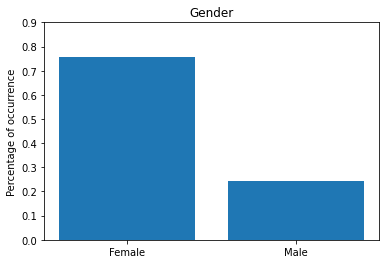

In [104]:
plt.bar(list(set(df.gender)),df.gender.value_counts()/df.gender.value_counts().sum());
plt.ylabel("Percentage of occurrence");
plt.title("Gender")
plt.yticks(np.arange(0, 1, step=0.1));

Text(0.5, 1.0, 'Gender')

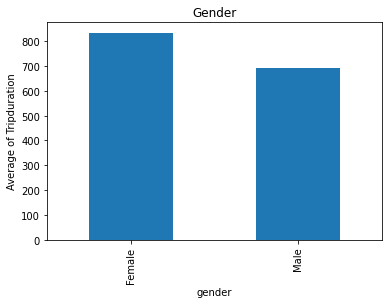

In [105]:


df.groupby("gender")["tripduration"].mean().plot(kind = "bar");
plt.ylabel("Average of Tripduration");
plt.title("Gender")




### Males uses this service more than Females in this dataset

In [106]:
df.usertype.value_counts()

Subscriber    2293395
Dependent          76
Customer           54
Name: usertype, dtype: int64

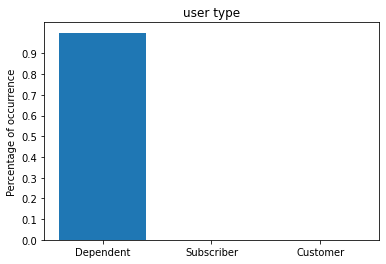

In [107]:

plt.bar(list(set(df.usertype)),df.usertype.value_counts()/df.usertype.value_counts().sum());
plt.title("user type")
plt.ylabel("Percentage of occurrence");
plt.yticks(np.arange(0, 1, step=0.1));

### Almost all the users are subscriber it seems it was at the begining of the project so i guess it will be better if we used more recent data but i already have more than 3 million records 

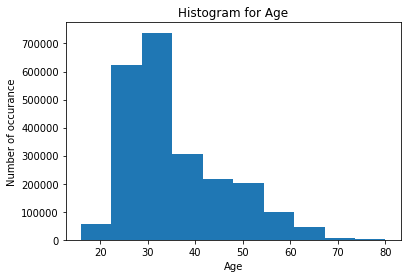

In [108]:
plt.hist(df.Age);
plt.xlabel("Age");
plt.ylabel("Number of occurance");

plt.title("Histogram for Age");

### Its obvious that most of the clients are at Age of 30 then the 20 and 40 then its getting fewer as clients get older than 40 and no clinets younger than 10 which is logic

In [109]:
df.E_Month.value_counts()

June         471462
May          358311
August       326835
July         250313
April        238719
October      186671
March        143705
November     100157
January       79143
December      77707
February      60484
September        18
Name: E_Month, dtype: int64

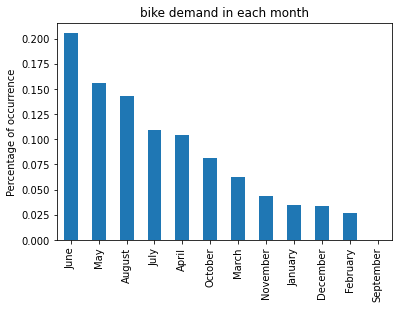

In [110]:
(df.E_Month.value_counts()/df.shape[0]).plot(kind = "bar");
plt.title("bike demand in each month");
plt.ylabel("Percentage of occurrence");

### the demand on the bikes tends to increase in the summer more than winter 

In [111]:
df[df.E_Month == "September"]

,trip_id,start_time,stop_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,S_Day,S_Year,S_Month,E_Day,E_Year,E_Month,Age
1518388,7221407,2015-08-31 23:59:00,2015-09-01 00:03:00,4254,245,241,Morgan St & Polk St,21,Aberdeen St & Jackson Blvd,Subscriber,Male,1988.0,Monday,2015,August,Tuesday,2015,September,27.0
1518391,7221404,2015-08-31 23:57:00,2015-09-01 00:05:00,3474,465,66,Clinton St & Lake St,110,Dearborn St & Erie St,Subscriber,Male,1985.0,Monday,2015,August,Tuesday,2015,September,30.0
1518392,7221403,2015-08-31 23:56:00,2015-09-01 00:08:00,1540,716,332,Halsted St & Diversey Pkwy,319,Greenview Ave & Diversey Pkwy,Subscriber,Male,1993.0,Monday,2015,August,Tuesday,2015,September,22.0
1518395,7221398,2015-08-31 23:55:00,2015-09-01 00:16:00,2607,1268,15,Racine Ave & 18th St,61,Wood St & Milwaukee Ave,Subscriber,Male,1989.0,Monday,2015,August,Tuesday,2015,September,26.0
1518396,7221397,2015-08-31 23:55:00,2015-09-01 00:00:00,3319,355,284,Michigan Ave & Jackson Blvd,194,Wabash Ave & Wacker Pl,Subscriber,Male,1982.0,Monday,2015,August,Tuesday,2015,September,33.0
1518397,7221396,2015-08-31 23:54:00,2015-09-01 00:07:00,2159,725,493,Western Ave & Roscoe St,228,Damen Ave & Melrose Ave,Subscriber,Male,1985.0,Monday,2015,August,Tuesday,2015,September,30.0
1518398,7221395,2015-08-31 23:53:00,2015-09-01 00:04:00,2317,671,294,Broadway & Berwyn Ave,460,Clark St & Bryn Mawr Ave,Subscriber,Male,1982.0,Monday,2015,August,Tuesday,2015,September,33.0
1518401,7221392,2015-08-31 23:51:00,2015-09-01 00:18:00,702,1626,299,Halsted St & Roscoe St,254,Pine Grove Ave & Irving Park Rd,Subscriber,Male,1981.0,Monday,2015,August,Tuesday,2015,September,34.0
1518409,7221384,2015-08-31 23:48:00,2015-09-01 00:11:00,3862,1389,174,Canal St & Madison St,226,Racine Ave & Belmont Ave,Subscriber,Female,1985.0,Monday,2015,August,Tuesday,2015,September,30.0
1518410,7221383,2015-08-31 23:47:00,2015-09-01 00:22:00,3321,2075,15,Racine Ave & 18th St,504,Campbell Ave & Fullerton Ave,Subscriber,Male,1991.0,Monday,2015,August,Tuesday,2015,September,24.0


> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> some records had null values so i had to remove them also some records had tripduration less than 2 mints although start and end stations are different also had to remove them.
also in the Age column which i create from the birth year column i found some of the clinets are older than 80 years i removed these records even if its true its not regular thing

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> most of the variables are logically distriputed just the user type almost all of them of the type Subscriber  

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [112]:
df.to_station_id.value_counts()

91     47892
174    40669
192    36810
287    24924
283    24313
       ...  
392       16
400       14
391       14
395       12
440        7
Name: to_station_id, Length: 475, dtype: int64

In [113]:
df.groupby("E_Month")["tripduration"].mean()

E_Month
April          710.320339
August         760.539101
December       610.636352
February       693.204897
January        635.683181
July           764.966702
June           765.706680
March          678.777565
May            757.404855
November       628.227513
October        678.297443
September    11146.222222
Name: tripduration, dtype: float64

### September has higher tripduration but i guess its because of it has only 18 records


In [114]:
numeric_vars = ["tripduration", "Age"]
categoric_vars = ["usertype", "gender", "S_Day", "S_Year" ,"S_Year" ]


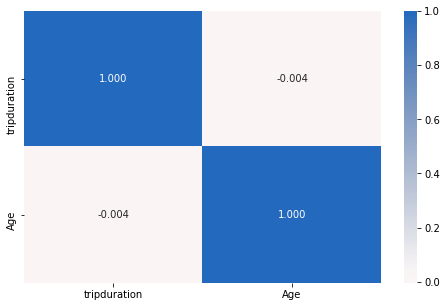

In [115]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

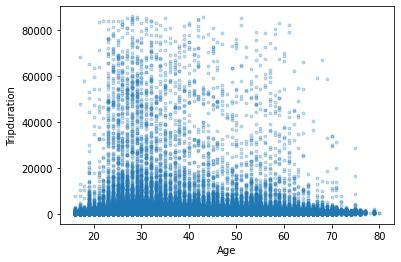

In [116]:

plt.scatter(df.Age, df.tripduration, alpha = 0.25, marker = '.' );
plt.xlabel("Age");
plt.ylabel("Tripduration");


## Most of the trip durations are less than 20000 seconds which is 5.5 hours 

In [117]:


Age_labels = ["0 to 20","20 to 30","30 to 40","40 to 50","50 to 60","60 to 70","70 to 80"]
def trip_duration_with_age_calc(df):
    age_ranges = [(0,20),(20,30),(30,40),(40,50),(50,60),(60,70),(70,80)]
    av_trip_duration_all = []
    av_trip_duration_male = []
    av_trip_duration_female = []
    for r in age_ranges:
        av_trip_duration_all.append(df[(df.Age > r[0]) & (df.Age < r[1])].tripduration.mean())
        av_trip_duration_male.append(df[(df.Age > r[0]) & (df.Age < r[1]) & (df.gender == "Male" )].tripduration.mean())
        av_trip_duration_female.append(df[(df.Age > r[0]) & (df.Age < r[1])& (df.gender == "Female" )].tripduration.mean())
    
    return av_trip_duration_all, av_trip_duration_male, av_trip_duration_female   



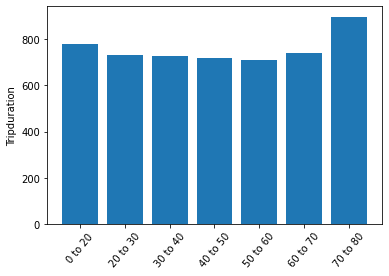

In [118]:
av_trip_duration_all, av_trip_duration_male, av_trip_duration_female  = trip_duration_with_age_calc(df)
plt.bar(range(len(av_trip_duration_all)),av_trip_duration_all,tick_label = Age_labels)

plt.ylabel("Tripduration");
plt.xticks(rotation = 50);



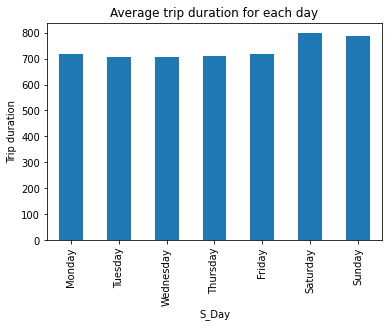

In [119]:
df.groupby("S_Day")["tripduration"].mean().plot(kind = "bar");

plt.title("Average trip duration for each day");
plt.ylabel("Trip duration");

### average of trip duration is heigher in weekends and in the age group between 70 and 80 

In [120]:
df["from_to_id"] = "From " + df["from_station_id"].astype(str) + " To " + df["to_station_id"].astype(str)

In [121]:
df.from_to_id.value_counts()

From 283 To 174    2907
From 195 To 91     2385
From 195 To 174    2205
From 49 To 174     2144
From 43 To 174     2111
                   ... 
From 5 To 459         1
From 103 To 202       1
From 492 To 283       1
From 256 To 110       1
From 61 To 491        1
Name: from_to_id, Length: 73415, dtype: int64

In [122]:
t = []

all_start_station_ids = sorted(df.from_station_id.unique())
for x in all_start_station_ids :
    t.append(df[df.from_station_id == x].tripduration.sum()) 
total_duration = pd.Series(t)

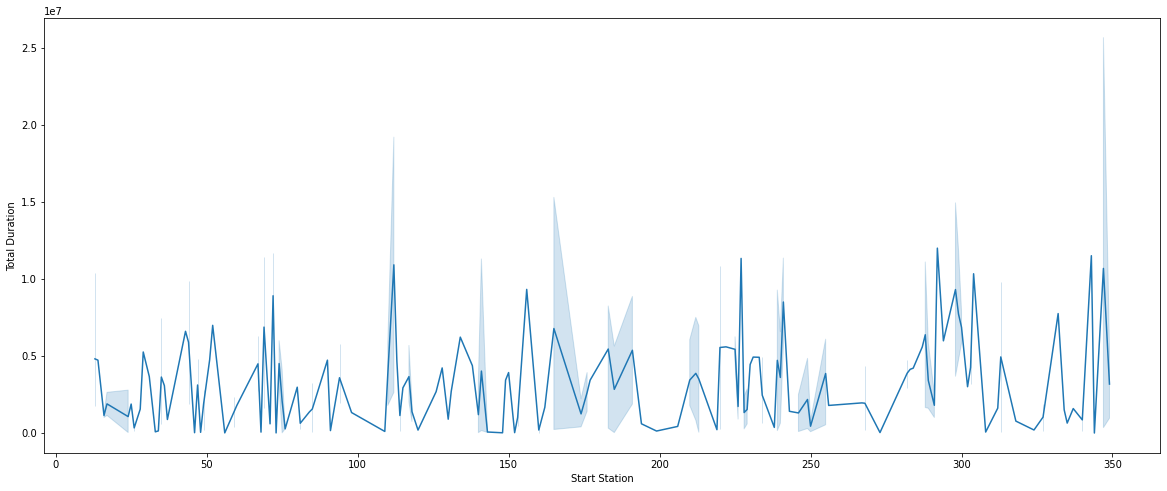

In [123]:
plt.figure(figsize = [20, 8]);
sb.lineplot(x = df['from_station_id'], y = total_duration);
plt.xlabel('Start Station');
plt.ylabel('Total Duration');


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> the average of tripduration is higher in clinets between 70 and 80 years old and in less than 20 years

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> the average of trip duration is higher in females than males

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

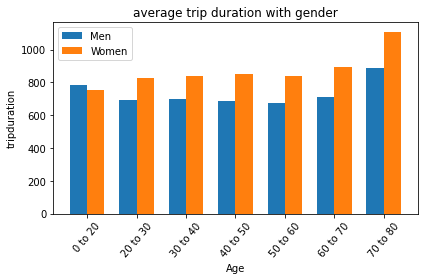

In [124]:
av_trip_duration_all, av_trip_duration_male, av_trip_duration_female  = trip_duration_with_age_calc(df)

x = np.arange(len(Age_labels))  # the label locations
width = 0.35

av_trip_duration_all = []

# max_y = max(max(av_trip_duration_male/df_male.sum()),max(df_female/df_female.sum()))*1.2
# y = np.arange(0,0.2,step = 0.02)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, av_trip_duration_male, width, label='Men')
rects2 = ax.bar(x + width/2, av_trip_duration_female, width, label='Women')

ax.set_ylabel('tripduration')
ax.set_xlabel('Age')
ax.set_title('average trip duration with gender')
ax.set_xticks(x)
# ax.set_yticks(y)
ax.set_xticklabels(Age_labels)
ax.legend()

plt.xticks(rotation = 50);

fig.tight_layout()

### the average of trip duration is higher in females than males and both males and females in the age group between 70 and 80 having the highest trip duration 

In [125]:
df.S_Day.value_counts()

Wednesday    375594
Thursday     375457
Tuesday      372178
Friday       351960
Monday       351201
Saturday     248431
Sunday       218704
Name: S_Day, dtype: int64

In [127]:
def groupby_days_with_tripduration_mean(df):
    df_female = df[df.gender == "Female"]
    df_male = df[df.gender == "Male"]
    df_female = df_female.groupby("S_Day")["tripduration"].mean()
    df_male = df_male.groupby("S_Day")["tripduration"].mean()
    return df_female, df_male
    

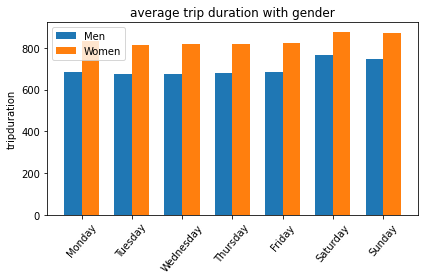

In [128]:
df_female, df_male = groupby_days_with_tripduration_mean(df)

labels = df_male.keys()
x = np.arange(len(labels))  # the label locations
width = 0.35
max_y = max(max(df_male),max(df_female))*1.2
# y = np.arange(0,max_y,step = 0.02)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_male, width, label='Men')
rects2 = ax.bar(x + width/2, df_female, width, label='Women')

ax.set_ylabel('tripduration')
ax.set_title('average trip duration with gender')
ax.set_xticks(x)
# ax.set_yticks(y)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation = 50);

fig.tight_layout()

### Weekend has the highest average in the trip duration for both males and females   

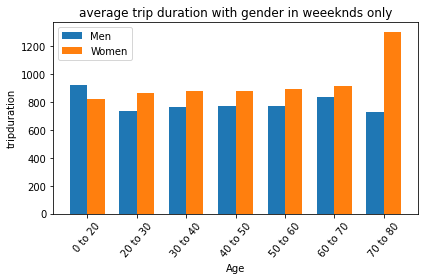

In [117]:
tmp_df = df[(df.S_Day == "Saturday") | (df.S_Day == "Sunday")] 
av_trip_duration_all, av_trip_duration_male, av_trip_duration_female  = trip_duration_with_age_calc(tmp_df)

x = np.arange(len(Age_labels))  # the label locations
width = 0.35

av_trip_duration_all = []

# max_y = max(max(av_trip_duration_male/df_male.sum()),max(df_female/df_female.sum()))*1.2
# y = np.arange(0,0.2,step = 0.02)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, av_trip_duration_male, width, label='Men')
rects2 = ax.bar(x + width/2, av_trip_duration_female, width, label='Women')

ax.set_ylabel('tripduration')
ax.set_xlabel('Age')
ax.set_title('average trip duration with gender in weeeknds only')
ax.set_xticks(x)
# ax.set_yticks(y)
ax.set_xticklabels(Age_labels)
ax.legend()

plt.xticks(rotation = 50);

fig.tight_layout()

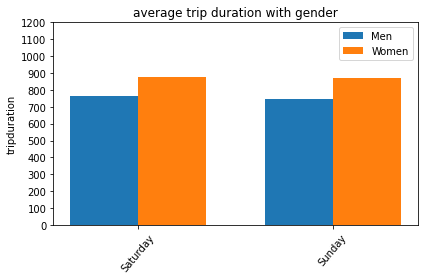

In [118]:
df_female, df_male = groupby_days_with_tripduration_mean(tmp_df)


labels = df_male.keys()
x = np.arange(len(labels))  # the label locations
width = 0.35
max_y = max(max(df_male),max(df_female))*1.4
y = np.arange(0,max_y,step = 100)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_male, width, label='Men')
rects2 = ax.bar(x + width/2, df_female, width, label='Women')

ax.set_ylabel('tripduration')
ax.set_title('average trip duration with gender')
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation = 50);

fig.tight_layout()

### The femails dominant the average trip duration specially in the age range between 70 and 80

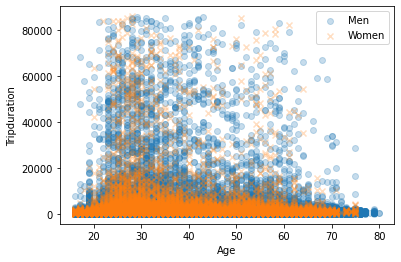

In [119]:
tmp_df_male = df[df.gender == "Male"]
tmp_df_female = df[df.gender == "Female"]

fig, ax = plt.subplots()

fg1 = ax.scatter(tmp_df_male.Age, tmp_df_male.tripduration, alpha = 0.25, marker = 'o' ,label='Men');
fg2 = ax.scatter(tmp_df_female.Age, tmp_df_female.tripduration, alpha = 0.25, marker = 'x' ,label='Women');
ax.set_xlabel("Age");
ax.set_ylabel("Tripduration");

ax.legend();


In [120]:
df.to_csv("all_files_compined_after_cleaning.csv",index=False,encoding= "utf-8-sig")

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> weekends have the highest trip duration, Females trips are most of the time below 20000 seconds 

### Were there any interesting or surprising interactions between features?

> Although females numbers are less than males and most of females trips are less than 20000 but the average trip duration for females are higher than males 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!